# NSF Computer and Information Science and Engineering (CISE) 

- `05050000`: Division of Computer and Network Systems (CNS)
- `05010000`: Division of Computing and Communication Foundations (CCF)
- `05020000`: Division of Information and Intelligent Systems (IIS)
- `05090000`: Office of Advanced Cyberinfrastructure (OAC)

In [1]:
import os,sys,json
import core.coworknet, core.nsf_utils
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx
from collections import Counter

Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.ru

In [2]:
grant_type = ["Standard Grant", "Continuing grant"] # draw only these types
div_type = {
    "05050000": "Division of Computer and Network Systems (CNS)",
    "05010000": "Division of Computing and Communication Foundations (CCF)",
    "05020000": "Division of Information and Intelligent Systems (IIS)",
    "05090000": "Office of Advanced Cyberinfrastructure (OAC)"
}

In [3]:
def histogram_num_pis(data, years, orgcodes):
    plt.title("[NSF {}-{}] histogram - number of PIs".format(years[0], years[-1]))
    plt.ylabel("Number of grants")
    plt.xlabel("Number of PIs")
    pis = [d["num_pis"] for d in data.values() if d["org"] in orgcodes]
    counter_pis = Counter(pis)
    print(counter_pis)
    x = range(1, 10)
    y = [counter_pis[i] if i in counter_pis else 0 for i in x]
    plt.bar(x, y)

In [4]:
data = {}
years = [2004]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
data = {k:v for k, v in data.items() if v["type"] in grant_type}
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"] == code and v["year"] == y]))

[2004]
Total number of grants 10212
Division of Computer and Network Systems (CNS) 405
Division of Computing and Communication Foundations (CCF) 332
Division of Information and Intelligent Systems (IIS) 362
Office of Advanced Cyberinfrastructure (OAC) 53


Counter({1: 633, 2: 243, 3: 123, 5: 83, 4: 61, 6: 4, 0: 2, 7: 2, 8: 1})


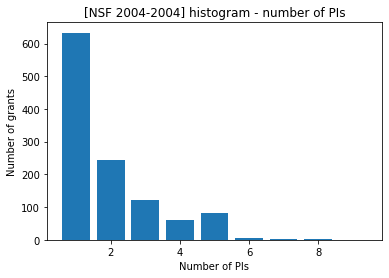

In [5]:
histogram_num_pis(data, years, div_type.keys())

In [6]:
grant_list = [k for k, d in data.items() if d["org"] in div_type.keys() and d["num_pis"] == 5]
print(grant_list)

['0403313', '0403340', '0403342', '0403428', '0403673', '0403760', '0403990', '0404208', '0406403', '0416128', '0420477', '0420614', '0420703', '0420793', '0420836', '0420933', '0420984', '0421063', '0421099', '0421109', '0421200', '0421282', '0421456', '0421502', '0421554', '0423336', '0423386', '0423431', '0423733', '0423891', '0424546', '0426125', '0426593', '0426683', '0426886', '0426971', '0426972', '0427005', '0427413', '0427794', '0428168', '0428216', '0428241', '0428249', '0428344', '0428404', '0428420', '0428472', '0428738', '0428856', '0428887', '0429086', '0429358', '0430175', '0430274', '0430444', '0430722', '0431070', '0432047', '0433540', '0433702', '0435061', '0435190', '0435297', '0435307', '0435353', '0435370', '0435389', '0435425', '0442156', '0444465', '0451843', '0453809', '0454066', '0454074', '0454114', '0454259', '0454279', '0454298', '0454333', '0454394', '0454404', '0454407']


Error: issues and etiquette concerning use of shared measurement data
Error: a brief history of scanning


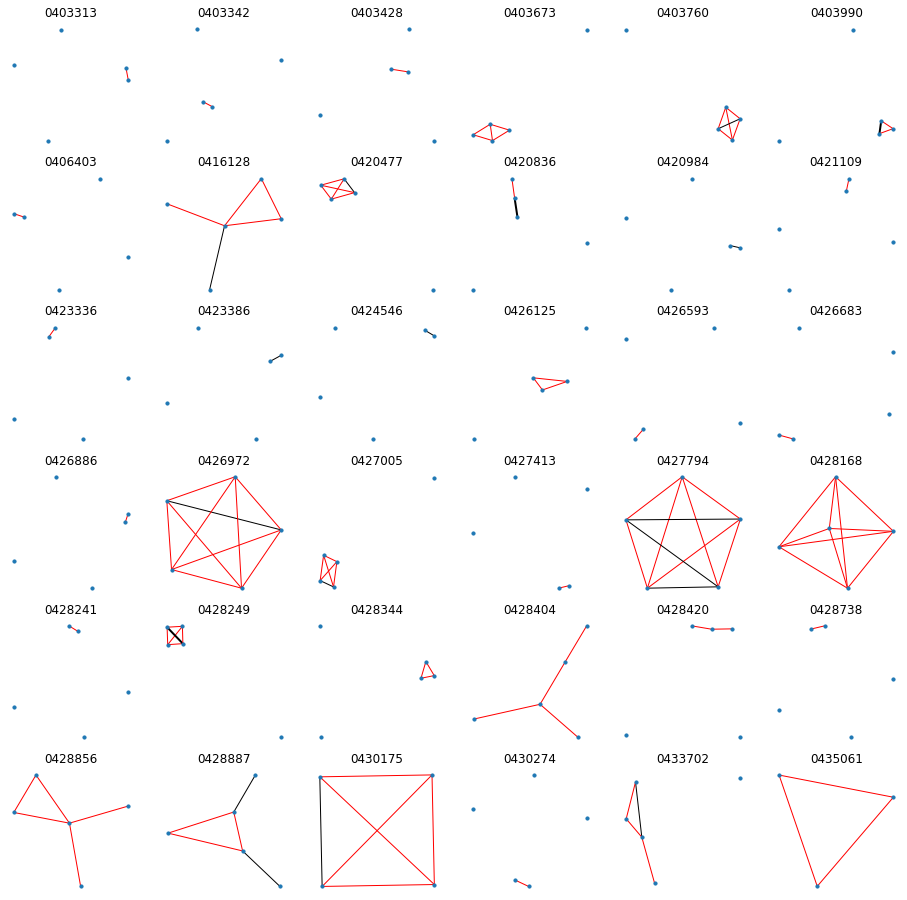

In [9]:
dim = 6
fig = plt.figure(figsize=(16,16))
gidx = 0
for grant_id in grant_list:
    G = core.coworknet.get_grant_coworknet_pis(grant_id)
    if len(G.edges) == 0:
        continue
#     print(G.edges.data())
    colors = []
    weight = []
    for u,v,data in G.edges.data():
        if data["grant"] == "other":
            colors.append("black")
            weight.append(1)
        elif data["grant"] == "both":
            colors.append("black")
            weight.append(2)
        else:
            colors.append("red")
            weight.append(1)
    fig.add_subplot(dim,dim,1+gidx).set_title(grant_id)
    nx.draw(G, node_size = 10, edge_color=colors, width=weight)
    gidx += 1
    if gidx >= dim*dim:
        break

In [10]:
data = {}
years = [2009]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
data = {k:v for k, v in data.items() if v["type"] in grant_type}
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"] == code and v["year"] == y]))

[2009]
Total number of grants 14758
Division of Computer and Network Systems (CNS) 733
Division of Computing and Communication Foundations (CCF) 535
Division of Information and Intelligent Systems (IIS) 627
Office of Advanced Cyberinfrastructure (OAC) 193


Counter({1: 1258, 2: 457, 3: 174, 5: 93, 4: 83, 6: 15, 7: 4, 8: 2, 0: 2})


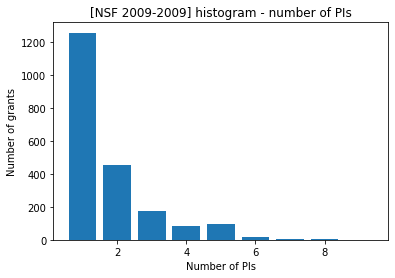

In [21]:
histogram_num_pis(data, years, div_type.keys())